This notebook is designed to test the new iterative lagorithm to calculate the decomposition of the correlation in terms of path length. 

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from spectre.model import FHN
from spectre.spectrum_general import matrix_solution
from spectre.spectrum_general import recursive_solution


plt.rc("text", usetex=True)
plt.rc("font", family="serif")
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")

Y is positive definite:  True


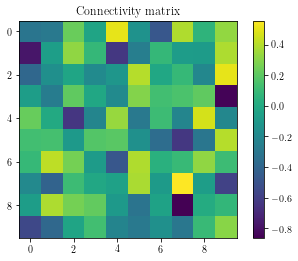

In [16]:
n = 10 # system size

# Connectivity matrix 
G = torch.randn(n, n)
G = 0.9 * G / torch.max(torch.abs(torch.linalg.eigvals(G)))

# Define the noise matrix
Y = torch.randn(n, n)
# make Y to be positive definite
Y = Y @ Y.t()
print("Y is positive definite: ", torch.all(torch.real(torch.linalg.eigvals(Y)) > 0).item())

# plot the matrix with the connectivity
plt.figure()
plt.imshow(G.numpy())
plt.colorbar()
plt.title("Connectivity matrix")
plt.show()

In [17]:
B = torch.linalg.inv(torch.eye(n) - G)
C = B @ Y @ B.t()

In [21]:
omega = 0.1

# convert G to comeple double
S = torch.linalg.inv(1j * omega * torch.eye(n) + G) @ Y.to(torch.complex64) @ torch.linalg.inv(- 1j * omega * torch.eye(n) + G.t())


In [24]:
S1 = (1 / omega **2) * torch.linalg.inv(torch.eye(n) + G / (1j * omega)) @ Y.to(torch.complex64) @ torch.linalg.inv(torch.eye(n) - G.t() / (1j * omega))

# check if the two solutions are the same
print("The two solutions are the same: ", torch.allclose(S, S1, atol=1e-6))

The two solutions are the same:  True
